# Homework 8

## Name: Nils Huber

In [110]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1: Reproducing plot from a scientific paper (2.5 P)

You are given a data file containing information about measuring anisotropy levels of gamma rays coming from outside of our Galaxy as a function of energy. This data corresponds to Table 1 in the following paper: https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.121.241101


In this task you will reproduce Fig. 2 from the paper.

The exact meaning of what was measured is absolutely not important for this task, but if you are running out of books during the dark cold winter evenings, you are always welcome to read it fully.

**(A)** (0.5 P)
Import data from the txt file and define arrays that correspond to the table's columns. The last point in the table is not an exact measured value but an upper limit, meaning that the real value can be anywhere below the $C_p + \delta C_p$ where $\delta C_p$ is the error of the last value. Correct this in your $C_p$ array.

In [111]:
from pathlib import Path

#Import
file_name='Table1_Ackermann2018(1).txt'
data=np.loadtxt(file_name)

#Define Collumns
Emin=data[:,0]
Emax=data[:,1]
Emean=data[:,2]
Cp=data[:,3]
Cp_ERR=data[:,4]

#Increasing last Cp by last Cp_ERR (?)
Cp[-1]+=Cp_ERR[-1]

**(B)** (0.5 P)

Make an array consisting of zeros and ones indicating whether the data point is an upper limit. Remember: only the last point in the table is an upper limit. 

In [112]:
isuplims = np.zeros(len(Cp), dtype=int)
isuplims[-1] = 1

**(C)** (1.5 P)
Using ```matplotlib.pyplot.errorbar()```, plot the values of $C_p \cdot E^4/\Delta E^2$ where $C_p$ are values from 4th column in the txt file, $E$ is the mean energy (column 3) and $\Delta E = (E_{max}- E_{min})$ (columns 2 and 1 correspondingly). Errors $\delta C_p$ will change by the same formula! 

Make a plot similar to Fig. 2.

Make sure:
- The correct values of $C_p \cdot E^4/\Delta E^2$ are plotted (check the plot from the paper!) 
- Both vertical and horizontal error bars are plotted
- The last point is displayed correctly as upper limit (with the arrow, the arrow must be visible) 
- The data points have label 'Ackermann et al. 2018 PRL 121' as the reference for the data
- No line connecting the data points (as in scatter plot) 
- Both x and y axes have logarithmic scale 
- Both x and y axes have labels 
- The label for y-axis uses $\LaTeX$ 

Make the figure even better by:
- changing its size to (10,6) 
- setting the font size 16 
- changing size of x and y ticks to 16 


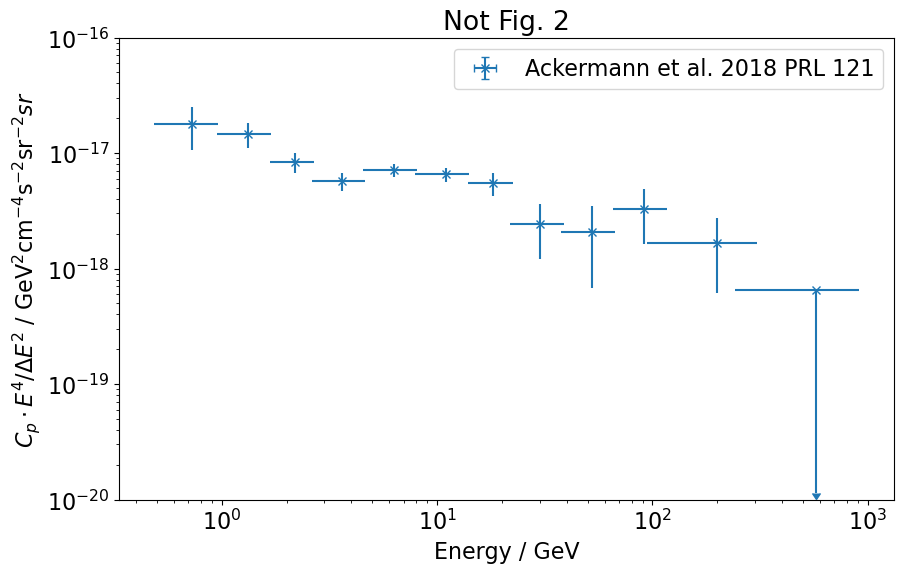

In [159]:
dE=(Emax-Emin)/2 #I think this half is missing cause else, the last errors are as large as the data itself

def f(C):
    return C*Emean**4/dE**2

val=f(Cp)
dval=f(Cp_ERR)

#brute fporcing the last value since val-dval is negative at the last pos and therfore the errobar would be infite
dval[-1]=val[-1]-1.15e-20

#Plotting
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16

plt.ylim(1e-20,1e-16)
plt.errorbar(Emean,val,yerr=dval,xerr=dE,marker='x',linestyle='',label='Ackermann et al. 2018 PRL 121',uplims=isuplims)

plt.title('Not Fig. 2')

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.xlabel('Energy / GeV')
plt.ylabel(r'$C_p\cdot E^4/\Delta E^2$ / GeV$^2$cm$^{-4}$s$^{-2}$sr$^{-2}sr$')
plt.show()

# Problem 2: Bifurcation diagram - The logistic map (2.5 P)

### **Little introduction** 
Chaos theory states that within the apparent randomness of chaotic complex systems, there are underlying patterns. It deals with orders in special dynamic systems whose temporal development appears unpredictable, although the underlying equations are actually deterministic.

The butterfly effect, an underlying principle of chaos, describes how a small change in one state of a deterministic nonlinear system can result in large differences in a later state meaning that there is sensitive dependence on initial conditions. A metaphor for this behavior is that a butterfly flapping its wings in Texas can cause a tornado in Brazil. 
In 1960, Edward Norton Lorenz worked on numerical weather prediction, which relied on computers to forecast weather by processing observational data on such things as temperature, pressure, and wind. The computer worked with 6-digit precision, but the printout rounded variables off to a 3-digit number, so a value like 0.506127 printed as 0.506. Lorenz observed that this small variation in the initial data of the variables in his simple weather model produced very different weather forecast results. This sensitive dependence on the initial conditions became known as the butterfly effect.

The **logistic map** is an example of how complex, chaotic behaviour can arise from simple non-linear equations and can be expressed with the following equation:

$$ x_{n+1}=r~ x_{n}(1-x_{n})\quad\text{with}\quad n=0,1,2,3…  $$ 

It can be explained with the **demographic model**:

The delevopment of a population will be described by mathematical laws. From the size $ X_{n}$ of the population at a certain point in time n, the size $ X_{n+1}$ after a reproduction period (e.g. after one year) is to be inferred. The factor r causes the population to change (like a growth/reduction factor). 
The behaviour depends on r:
* With 0 < r <  1, the population dies out in any case.
* With 1 < r < 2, the population monotonically approaches the limit value $ \tfrac{r-1}{r} $ 
* With 2 < r < 3, the population monotonically approaches the limit value $ \tfrac{r-1}{r} $ alternating
* At r $\approx$ 3.57 the chaos begins: The sequence initially jumps periodically between the neighbourhoods of the now unstable accumulation points. Tiny changes to the initial value result in a wide variety of subsequent values - a characteristic of chaos

The **bifurcation diagram** summarises these observations. The horizontal axis indicates the value of the parameter r and the vertical axis the accumulation points for the sequence $x_{n}$.

## **Your Task**:

Create the bifurcation diagram in the following steps:

**(A) Define the function (1 P)** 

* Think about how you want to create the logistic map to use it for your plot - remember: The limit value of the sequence depending on r, $x_{n}$, will be on the y-axis and r will be on the x-axis.


* Show the region **0 < r < 4** to see the development described above. You can use ```np.linspace``` for that and take at least 15000 steps between the values.

(*Hint*: Again, you need the **limit values** of the sequence so it's helpful to go through a loop a few times to reach the limit value and just take ```x_n = r*x_n* (1-x_n)```. You could fill two empty arrays for your x (r) and y (x_lim) values. Another option would be to define the function for the logistic map at first and use it later for plotting. These are just examples, it's up to you. Don't forget that you are working with a recursive function where you can encounter the problem that you have to define your value $x_{n}$ before you start to calculate the values.)

**(B) Plot the data and create a good diagram (1.5 P)** 
* The **width** of the figure should be 12 and the **height** 6  
* Use the ``plt.plot`` function and it is important to choose the right **markers**: Use ',k' for this case and 0.25 as your **transparency** value alpha
* Plot the **title** "Bifurcation diagram" with size 20 and the **labels** with size 15
* Make sure, the **scale** for the x-axis is between 0 and 4 and for the y-axis between -0.01 and 1
* Change **tick size** to 12
* In the end, we want to mark the regions mentioned above in the example of the demographic model. Add **vertical lines** at r=1, r=2, r=3 and r= 3.57 in different colors and add for every line a short description for the legend of your plot. Set the transpareny to 0.25 and put the legend in the upper left.

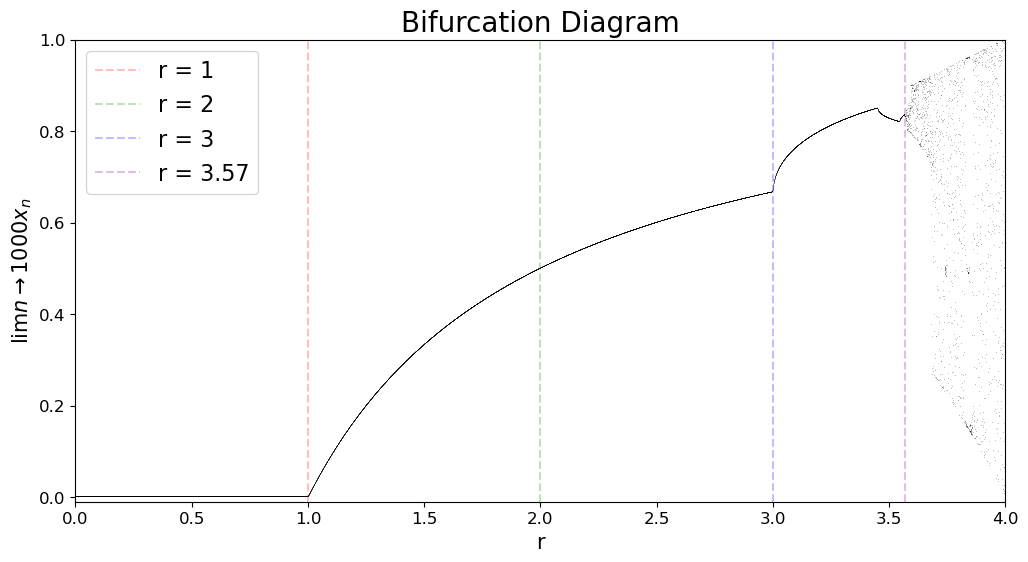

In [ ]:
def logistic_map(r, x):
    return r * x * (1 - x)


r_lin = np.linspace(0, 4, 15000)
iterations = 900
last_iterations = 100 

xlim = []

for r in r_lin:
    x = 0.2 #random start
    for i in range(iterations):
        x = logistic_map(r, x)
    
    for i in range(last_iterations):
        x = logistic_map(r, x)
    xlim.append(x)


plt.figure(figsize=(12, 6))

plt.plot(r_lin, xlim, ',k',alpha=0.25)

plt.title("Bifurcation Diagram", fontsize=20)
plt.xlabel("r", fontsize=15)
plt.ylabel(r"$\lim{n\to1000}x_{n}$", fontsize=15)
plt.xlim(0, 4)
plt.ylim(-0.01, 1)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.axvline(x=1, color='r', linestyle='--', alpha=0.25, label="r = 1")
plt.axvline(x=2, color='g', linestyle='--', alpha=0.25, label="r = 2")
plt.axvline(x=3, color='b', linestyle='--', alpha=0.25, label="r = 3")
plt.axvline(x=3.57, color='purple', linestyle='--', alpha=0.25, label="r = 3.57")

plt.legend(loc='upper left')
plt.show()